In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("./data.csv")
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
data.head()

,season,age,diseases,accident,surgery,fever,alcohol_intake,smoking_habit,sittyng_hours,diagnoses
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x ,y , test_size=0.15 , random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
cllassifier = LogisticRegression(class_weight='balanced')
cllassifier.fit(x_train , y_train)

In [36]:
y_pred = cllassifier.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print(confusion_matrix(y_test,y_pred))
acc = accuracy_score(y_test , y_pred)
f1 = f1_score(y_test , y_pred)

''' 
true  | false
  +   |   -
--------------
false | true
  +   |   -  

  correct-predicton = sum(main diognal)
  acc = correct-prediction / total

  recall = tp/(tp + fn)
  precision = tp/(tp + fp)
  F1score = 2* recall * precision/(recall + precision)
'''

print(f"acc = {acc}")
print(f"f1 = {f1}")


[[10  3]
 [ 0  2]]
acc = 0.8
f1 = 0.5714285714285715


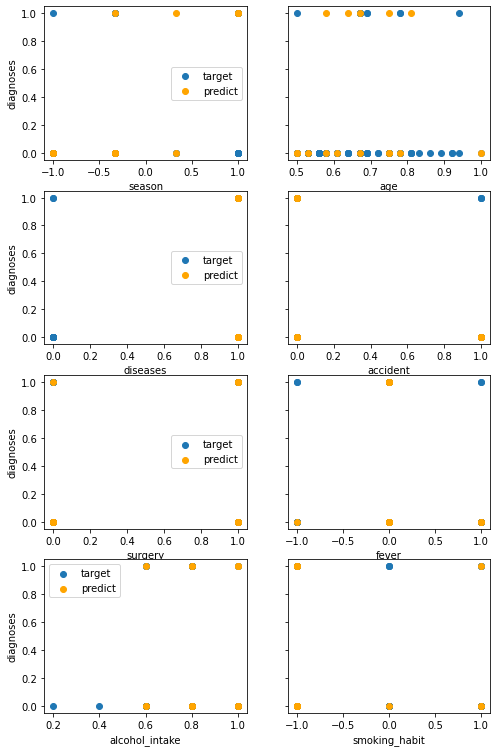

In [45]:
x_features = data.columns[:-1]
fig,ax=plt.subplots(4,2,figsize=(8,13),sharey=True)
k = 0
for i in range(4):
    for j in range(2):
        ax[i][j].scatter(x_train[:,k],y_train, label = 'target')
        ax[i][j].set_xlabel(x_features[k])
        ax[i][j].scatter(x_test[:,k],y_pred,color='orange', label = 'predict')
        k+=1
    ax[i][0].set_ylabel("diagnoses");
    ax[i][0].legend();
plt.show()